In [192]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 25)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('training_sample_complete.csv')

# df = pd.read_excel('validation.xlsx')[['ID', 'AVG', 'text', 'hash', 'dot', 'polarity', 'subjectivity']]
df2 = df.drop(columns = ['id_str_x', 'Rscore', 'Jscore', 'Unnamed: 0', 'source', 'text', 'created_at', 'retweet_count', 'favorite_count', 'is_retweet', 'id_str_y', 'date', 'hour', 'min', 'time', 'linked'])

df2 

,ID,AVG,hash,dot,polarity,subjectivity,exist_stock,exist_market,exist_agreement,exist_negotiator,exist_negotiation,exist_trade,exist_china,exist_economy,exist_job,exist_tariff,exist_employment,exist_s&p,exist_auto,exist_farmer,economy_word_occurrance
0,1607,1.00,0,0,0.125000,0.216667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11849,4.50,0,0,0.233333,0.133333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10562,4.00,0,0,0.384333,0.776667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6852,1.50,0,0,0.250000,0.218750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7865,1.00,1,0,0.500000,0.450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4128,1.00,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5993,1.00,0,0,1.000000,0.695000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3789,1.00,0,0,0.800000,0.825000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1444,3.50,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2160,4.50,0,0,0.233333,0.966667,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2


In [165]:
y_training = df['AVG']

X_training = df[['hash', 'dot', 'polarity', 'subjectivity', 'exist_stock',
       'exist_market', 'exist_agreement', 'exist_negotiator',
       'exist_negotiation', 'exist_trade', 'exist_china', 'exist_economy',
       'exist_job', 'exist_tariff', 'exist_employment', 'exist_s&p',
       'exist_auto', 'exist_farmer', 'economy_word_occurrance']]

In [164]:
df2.columns

Index(['ID', 'AVG', 'hash', 'dot', 'polarity', 'subjectivity', 'exist_stock',
       'exist_market', 'exist_agreement', 'exist_negotiator',
       'exist_negotiation', 'exist_trade', 'exist_china', 'exist_economy',
       'exist_job', 'exist_tariff', 'exist_employment', 'exist_s&p',
       'exist_auto', 'exist_farmer', 'economy_word_occurrance'],
      dtype='object')

accuracy score 0.34274627447372363


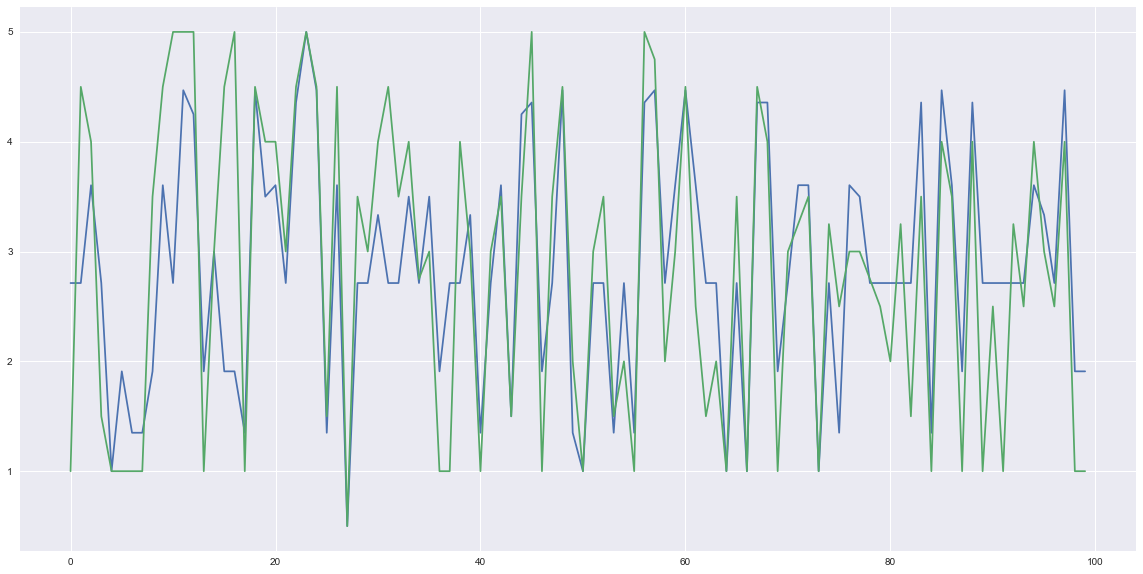

In [109]:
# decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)

decision_tree = DecisionTreeRegressor(random_state=0, max_depth=4)

decision_tree = decision_tree.fit(X_training, y_training)

y_pred = decision_tree.predict(X_training)


# y_pred = y_pred.reshape(-1,1)

# print (y_val)
# print (np.array(y_pred))

print ('accuracy score', r2_score(y_pred, y_training))


plt.figure(figsize=(20,10)) 

plt.plot(y_pred)
plt.plot(y_training)

# plt.scatter(range(len(y_pred)),y_pred)
# plt.scatter(range(len(y_val)),y_val)

plt.show()

40.50671234974127 %


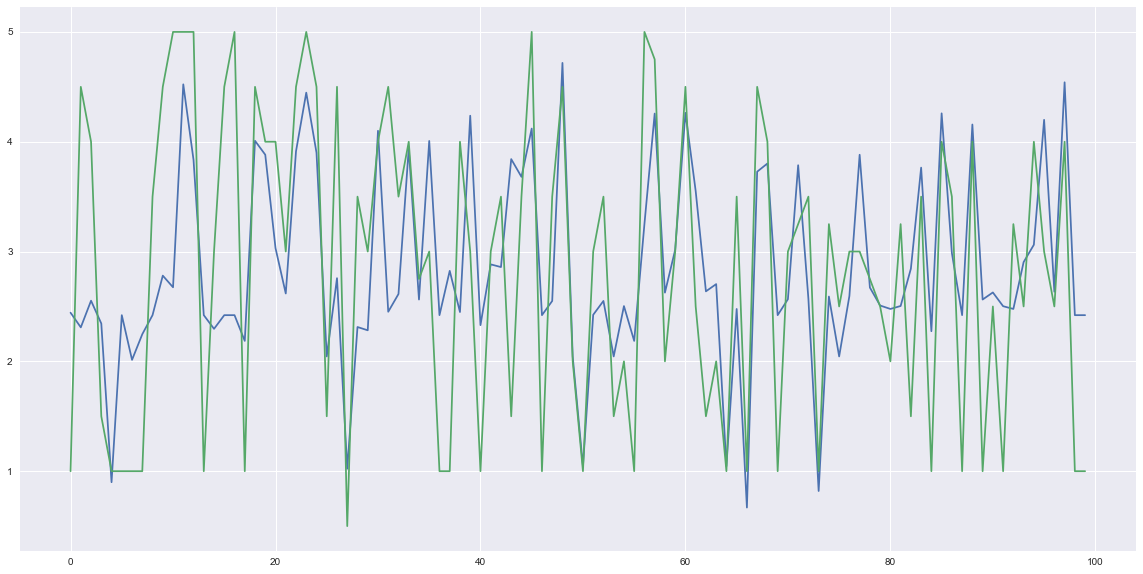

In [110]:
from sklearn.linear_model import LinearRegression

y_training_reshaped = y_training.values.reshape(-1,1)

regressor = LinearRegression()

regressor.fit(X_training, y_training_reshaped)

y_pred = regressor.predict(X_training)

accuracy = regressor.score(X_training, y_training_reshaped)

print(accuracy*100,'%')


plt.figure(figsize=(20,10)) 

plt.plot(y_pred)
plt.plot(y_training)

# plt.scatter(range(len(y_pred)),y_pred)
# plt.scatter(range(len(y_val_reshaped)),y_val)

plt.show()

In [185]:
y_training

y_training_class = []


for item in y_val:
    if item >= 3:
        y_training_class.append(1)
    else:
        y_training_class.append(0)

        
df_full = pd.read_csv('full.csv')

df_full.columns



df_staff = df_full.loc[df_full['source'] == "Twitter Media Studio"]

X_staff = df_staff[['hash', 'dot', 'polarity', 'subjectivity', 'exist_stock',
       'exist_market', 'exist_agreement', 'exist_negotiator',
       'exist_negotiation', 'exist_trade', 'exist_china', 'exist_economy',
       'exist_job', 'exist_tariff', 'exist_employment', 'exist_s&p',
       'exist_auto', 'exist_farmer', 'economy_word_occurrance']]

y_staff = np.zeros(len(X_full_staff))




y_training = pd.DataFrame(y_training_class, columns = ['AVG'])

y_staff = pd.DataFrame(y_staff, columns = ['AVG'])



df_android = pd.read_csv("test.csv")

X_android = df_android[['hash', 'dot', 'polarity', 'subjectivity', 'exist_stock',
       'exist_market', 'exist_agreement', 'exist_negotiator',
       'exist_negotiation', 'exist_trade', 'exist_china', 'exist_economy',
       'exist_job', 'exist_tariff', 'exist_employment', 'exist_s&p',
       'exist_auto', 'exist_farmer', 'economy_word_occurrance']]

y_android = df_android['sender']

y_android = pd.DataFrame(y_android.values, columns = ['AVG'])


X_frames = [X_training, X_staff, X_android]
y_frames = [y_training, y_staff, y_android]

X_all = pd.concat(X_frames)

y_all = pd.concat(y_frames)

X_all

,hash,dot,polarity,subjectivity,exist_stock,exist_market,exist_agreement,exist_negotiator,exist_negotiation,exist_trade,exist_china,exist_economy,exist_job,exist_tariff,exist_employment,exist_s&p,exist_auto,exist_farmer,economy_word_occurrance
0,0,0,0.125000,0.216667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0.233333,0.133333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0.384333,0.776667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0.250000,0.218750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0.500000,0.450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1.000000,0.695000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0.800000,0.825000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0.233333,0.966667,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2


In [198]:
X_all.to_csv('X_all.csv')

y_all.to_csv('y_all.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


In [184]:
X_all.to_csv('check.csv')

accuracy score 0.755331088664422


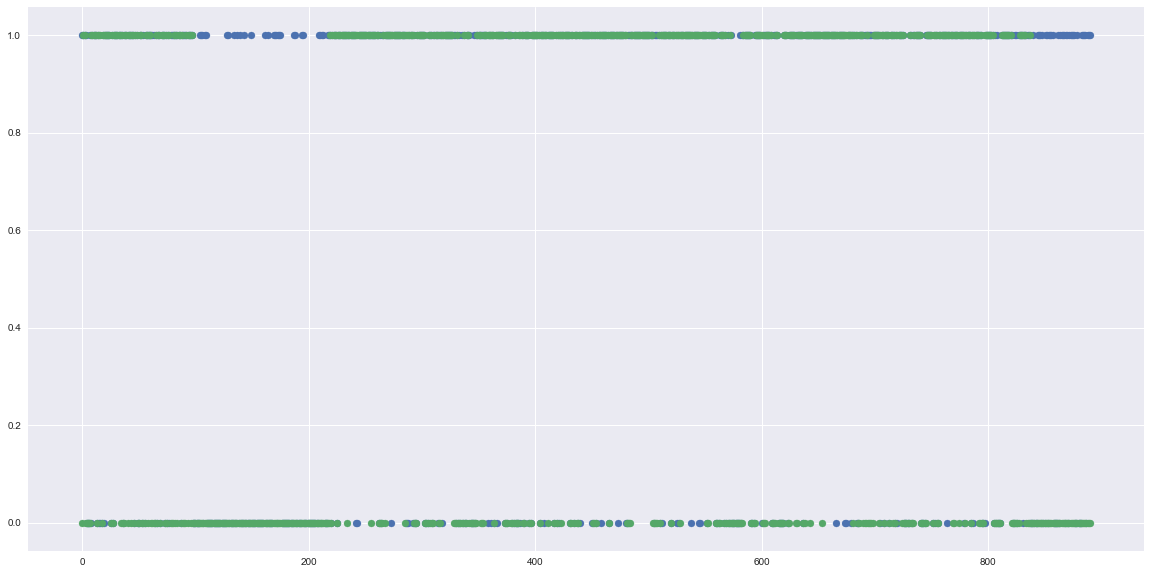

In [190]:
# decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)

decision_tree = decision_tree.fit(X_all, y_all)

y_pred = decision_tree.predict(X_all)


print ('accuracy score', accuracy_score(y_pred, y_all))


plt.figure(figsize=(20,10)) 

# plt.plot(y_pred)
# plt.plot(y_val_class)

plt.scatter(range(len(y_pred)),y_pred)
plt.scatter(range(len(y_all)),y_all)

plt.show()

training accuracy score 0.7495987158908507
test accuracy score 0.7574626865671642


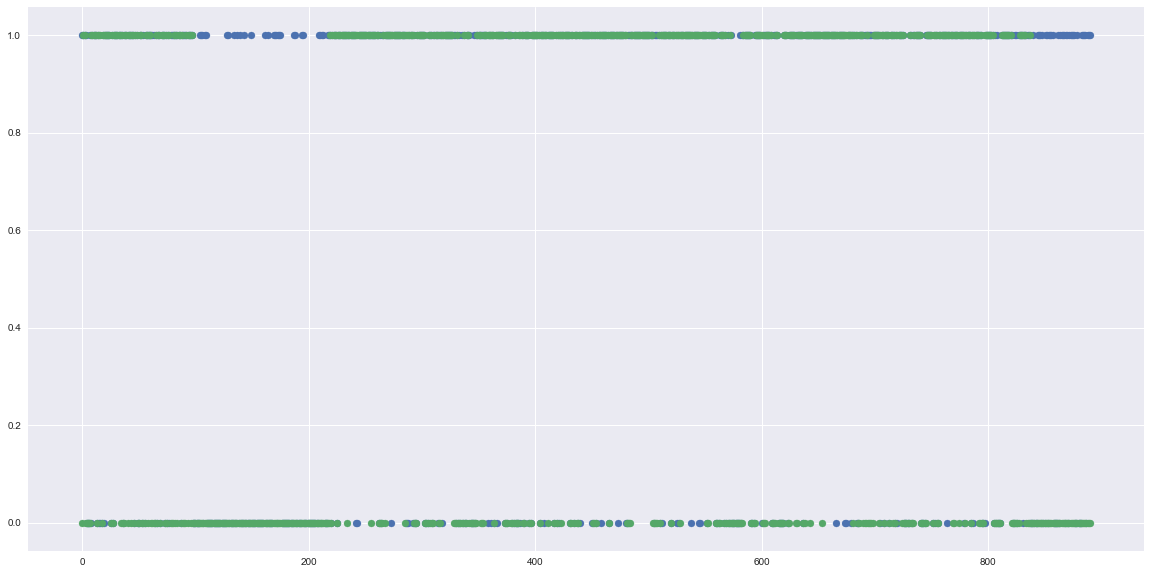

In [197]:
train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X_all, y_all, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4)

decision_tree = decision_tree.fit(X_train, y_train)
y_pred_train = decision_tree.predict(X_train)

print ('training accuracy score', accuracy_score(y_pred_train, y_train))

y_pred_test = decision_tree.predict(X_test)

print ('test accuracy score', accuracy_score(y_pred_test, y_test))                           


plt.figure(figsize=(20,10)) 


plt.scatter(range(len(y_pred)),y_pred)
plt.scatter(range(len(y_all)),y_all)

plt.show
